# EDA: Financial Inclusion

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from IPython.display import Image 
import scipy.stats as sp 
import os 
from scipy import stats 
import seaborn as sns
from matplotlib import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from datetime import datetime
import re
import altair as alt
# alt.renderers.enable('default')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## Descripcion de datos

Base de datos original INEGI: ENIF (Encuesta Nacional de Inclusión Financiera) 13,554 valores con más de 380 variables, La base de datos ya esta estandarizada y esto puede hacer un poco complicada su lectura a simple vista:

In [3]:
dataset = pd.read_csv('Datos 2021.csv')
dataset

,FOLIO,VIV_SEL,HOGAR,N_REN,P3_1_1,P3_1_2,P3_2,P3_3,P3_4,P3_5,...,P14_3_3,P14_4_3,P14_2_4,TLOC,REGION,SEXO,EDAD,EST_DIS,UPM_DIS,FAC_ELE
0,1,1,1,1,0,0,4,2,1,8,...,NaN,NaN,2,1,3,2,83,3,1,3807
1,2,2,1,1,3,3,6,2,1,1,...,NaN,NaN,2,1,3,2,33,3,1,1903
2,3,3,1,4,3,2,1,2,2,1,...,NaN,NaN,2,1,3,1,30,3,1,8897
3,4,4,1,1,2,6,3,2,2,5,...,NaN,NaN,2,1,3,2,64,3,1,5710
4,5,5,1,1,2,5,5,2,1,8,...,NaN,NaN,2,1,3,1,70,3,1,14236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,13348,15,1,1,2,3,4,2,1,8,...,5.0,3.0,2,4,3,1,65,231,2013,1078
13550,13349,16,1,1,3,3,5,2,1,1,...,5.0,3.0,2,4,3,1,60,231,2013,2155
13551,13350,17,1,2,3,3,5,2,2,5,...,NaN,NaN,2,4,3,2,20,231,2013,1622
13552,13351,18,1,2,6,3,6,2,2,1,...,NaN,NaN,2,4,3,1,43,231,2013,2155


In [4]:
dataset.shape

(13554, 382)

In [5]:
description = dataset.iloc[0].to_dict()
description

{'FOLIO': 1.0,
 'VIV_SEL': 1.0,
 'HOGAR': 1.0,
 'N_REN': 1.0,
 'P3_1_1': 0.0,
 'P3_1_2': 0.0,
 'P3_2': 4.0,
 'P3_3': 2.0,
 'P3_4': 1.0,
 'P3_5': 8.0,
 'P3_6': 6.0,
 'P3_7': nan,
 'P3_8A': nan,
 'P3_8B': nan,
 'P3_9': nan,
 'P3_10': nan,
 'P3_11': 2.0,
 'P4_1': 2.0,
 'P4_2_1': 2.0,
 'P4_2_2': 1.0,
 'P4_2_3': 2.0,
 'P4_2_4': 2.0,
 'P4_2_5': 2.0,
 'P4_3': 1.0,
 'P4_4_1': nan,
 'P4_4_2': nan,
 'P4_4_3': nan,
 'P4_4_4': nan,
 'P4_4_5': nan,
 'P4_4_6': nan,
 'P4_4_7': nan,
 'P4_5': 2.0,
 'P4_6_1': 3.0,
 'P4_6_2': 1.0,
 'P4_6_3': 1.0,
 'P4_6_4': 3.0,
 'P4_6_5': 3.0,
 'P4_6_6': 3.0,
 'P4_7_1': 1.0,
 'P4_7_2': 1.0,
 'P4_7_3': 1.0,
 'P4_8_1': 3.0,
 'P4_8_2': 3.0,
 'P4_8_3': 3.0,
 'P4_8_4': 3.0,
 'P4_8_5': 3.0,
 'P4_8_6': 2.0,
 'P4_9_1': 2.0,
 'P4_9_2': 2.0,
 'P4_9_3': 2.0,
 'P4_9_4': 2.0,
 'P4_10': 1.0,
 'P5_1_1': 2.0,
 'P5_1_2': 2.0,
 'P5_1_3': 2.0,
 'P5_1_4': 2.0,
 'P5_1_5': 2.0,
 'P5_1_6': 2.0,
 'P5_2_1': nan,
 'P5_2_2': nan,
 'P5_2_3': nan,
 'P5_2_4': nan,
 'P5_2_5': nan,
 'P5_2_6': nan,
 'P

In [6]:
dataset.info

<bound method DataFrame.info of        FOLIO  VIV_SEL  HOGAR  N_REN  P3_1_1  P3_1_2  P3_2  P3_3  P3_4  P3_5  \
0          1        1      1      1       0       0     4     2     1     8   
1          2        2      1      1       3       3     6     2     1     1   
2          3        3      1      4       3       2     1     2     2     1   
3          4        4      1      1       2       6     3     2     2     5   
4          5        5      1      1       2       5     5     2     1     8   
...      ...      ...    ...    ...     ...     ...   ...   ...   ...   ...   
13549  13348       15      1      1       2       3     4     2     1     8   
13550  13349       16      1      1       3       3     5     2     1     1   
13551  13350       17      1      2       3       3     5     2     2     5   
13552  13351       18      1      2       6       3     6     2     2     1   
13553  13352       20      1      2       3       3     1     2     1     5   

       ...  P14_3_3

In [7]:
dataset.describe()

,FOLIO,VIV_SEL,HOGAR,N_REN,P3_1_1,P3_1_2,P3_2,P3_3,P3_4,P3_5,...,P14_3_3,P14_4_3,P14_2_4,TLOC,REGION,SEXO,EDAD,EST_DIS,UPM_DIS,FAC_ELE
count,13554.000000,13554.000000,13554.000000,13554.000000,13554.000000,13554.000000,13554.000000,13554.000000,13554.000000,13554.000000,...,1359.000000,1359.000000,13554.000000,13554.000000,13554.000000,13554.000000,13554.000000,13554.000000,13554.000000,13554.000000
mean,6676.244577,6.540283,1.017190,1.751365,4.462078,3.288107,4.003689,1.934411,1.837317,2.663273,...,3.522443,2.425313,1.996311,2.114579,3.451675,1.541906,44.118194,111.431017,1048.114579,6664.329349
std,3854.454608,5.571974,0.145519,1.026689,2.539106,1.507598,1.862812,0.247572,0.369089,2.369523,...,1.883395,0.734270,0.060627,1.239999,1.793617,0.498259,17.330909,67.917406,578.400727,6959.077691
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,246.000000
25%,3337.250000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,30.000000,53.000000,536.000000,2582.000000
50%,6684.500000,4.000000,1.000000,1.000000,3.000000,3.000000,5.000000,2.000000,2.000000,1.000000,...,5.000000,2.000000,2.000000,2.000000,3.000000,2.000000,42.000000,106.000000,1054.000000,4510.000000
75%,10004.750000,10.000000,1.000000,2.000000,6.000000,4.000000,5.000000,2.000000,2.000000,5.000000,...,5.000000,3.000000,2.000000,3.000000,5.000000,2.000000,56.000000,172.000000,1543.000000,7909.000000
max,13352.000000,23.000000,5.000000,15.000000,9.000000,6.000000,6.000000,2.000000,2.000000,8.000000,...,6.000000,9.000000,2.000000,4.000000,6.000000,2.000000,98.000000,235.000000,2013.000000,75538.000000


Por lo que de los mas de 380 variables se seleccionaron solo 10, para poder trabajar con estas en el ejercicio (Escolaridad,Ocupacion, Ingreso, Cuentas de nómina y de débito, genero) y se agregaron variables dummy para variables categoricas y poder trabajar con estas.

In [8]:
df = pd.read_csv('Data Final.csv', encoding= 'unicode_escape')
df

,Escolaridad,Nivel Escolar,Ocupación,Ingreso,Cuenta de Nómina,Tarjeta de Débito,Tarjeta Dummy,Uso de Tarjeta,Bancos,BancoDummy,Tamaño de localidad,Región,RegionDummy,Genero,GeneroDummy,Edad
0,0,Ninguno,No trabajó,0,No,Sí,1.0,1,0,0,100 000 y más habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Mujer,2,83
1,3,Secundaria.,trabajó por lo menos una hora,5000,No,Sí,1.0,0,0,0,100 000 y más habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Mujer,2,33
2,3,Secundaria.,trabajó por lo menos una hora,4000,No,NaN,NaN,0,0,0,100 000 y más habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Hombre,1,30
3,2,Primaria,Se dedica a los quehaceres del hogar o a cuida...,0,No,NaN,NaN,0,0,0,100 000 y más habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Mujer,2,64
4,2,Primaria,No trabajó,0,No,Sí,1.0,0,0,0,100 000 y más habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Hombre,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,2,Primaria,No trabajó,0,No,Sí,1.0,0,0,0,menor de 2 500 habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Hombre,1,65
13550,3,Secundaria.,trabajó por lo menos una hora,3600,No,Sí,1.0,0,0,0,menor de 2 500 habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Hombre,1,60
13551,3,Secundaria.,Se dedica a los quehaceres del hogar o a cuida...,0,No,NaN,NaN,0,0,0,menor de 2 500 habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Mujer,2,20
13552,6,Preparatoria o bachillerato,trabajó por lo menos una hora,4200,No,NaN,NaN,0,0,0,menor de 2 500 habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Hombre,1,43


In [9]:
df.shape

(13554, 16)

In [10]:
df.info

<bound method DataFrame.info of        Escolaridad                Nivel Escolar  \
0                0                      Ninguno   
1                3                  Secundaria.   
2                3                  Secundaria.   
3                2                     Primaria   
4                2                     Primaria   
...            ...                          ...   
13549            2                     Primaria   
13550            3                  Secundaria.   
13551            3                  Secundaria.   
13552            6  Preparatoria o bachillerato   
13553            3                  Secundaria.   

                                               Ocupación  Ingreso  \
0                                             No trabajó        0   
1                          trabajó por lo menos una hora     5000   
2                          trabajó por lo menos una hora     4000   
3      Se dedica a los quehaceres del hogar o a cuida...        0   
4         

In [11]:
df.describe()

,Escolaridad,Ingreso,Tarjeta Dummy,Uso de Tarjeta,BancoDummy,RegionDummy,GeneroDummy,Edad
count,13554.000000,13554.000000,7199.000000,13554.000000,13554.000000,13554.000000,13554.000000,13554.000000
mean,4.462078,4577.493434,0.919155,1.915302,1.867124,3.314889,1.541906,44.118194
std,2.539106,6727.939977,0.272615,5.462676,2.931316,1.727552,0.498259,17.330909
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,18.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,30.000000
50%,3.000000,3000.000000,1.000000,0.000000,0.000000,3.000000,2.000000,42.000000
75%,6.000000,6000.000000,1.000000,1.000000,2.000000,5.000000,2.000000,56.000000
max,9.000000,120000.000000,1.000000,85.000000,13.000000,6.000000,2.000000,98.000000


In [12]:
df_show=pd.value_counts(df['Genero']).to_frame()
total_show=np.sum(df_show['Genero'])
df_show['Porcentaje']=df_show['Genero']/total_show
df_show

,Genero,Porcentaje
Mujer,7345,0.541906
Hombre,6209,0.458094


Se calcula la proporción de género, se encuentra que el 54% son mujeres y el 46% son hombres de los encuestados

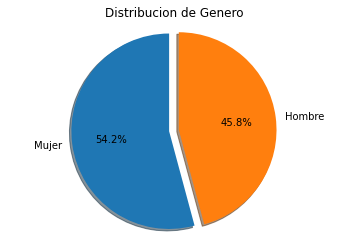

In [13]:
labels=df_show.index
sizes=df_show['Genero']
explode = (0.1,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Distribucion de Genero')
plt.show()

Del total de la muestra poblacional se encuentra que el 72% tiene una cuenta de nomina

In [14]:
df_Nomina=pd.value_counts(df['Cuenta de Nómina']).to_frame()
total_Nomina=np.sum(df_Nomina['Cuenta de Nómina'])
df_Nomina['Porcentaje']=df_Nomina['Cuenta de Nómina']/total_Nomina
df_Nomina

,Cuenta de Nómina,Porcentaje
No,9855,0.727092
Sí,3699,0.272908


Pero solo 7,200 contestaron a la pregunta si cuentan con tarjeta de débito, marcando como que si 6,617, el 92% de los que respondieron, pero solo el 49% de toda la población encuestada.

In [15]:
df_Debito=pd.value_counts(df['Tarjeta de Débito']).to_frame()
total_Debito=np.sum(df_Debito['Tarjeta de Débito'])
df_Debito['Porcentaje']=df_Debito['Tarjeta de Débito']/total_Debito
df_Debito

,Tarjeta de Débito,Porcentaje
Sí,6617,0.919155
No,582,0.080845


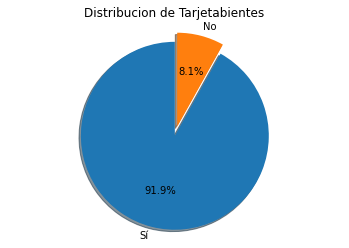

In [16]:
labels=df_Debito.index
sizes=df_Debito['Tarjeta de Débito']
explode = (0.1,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Distribucion de Tarjetabientes')
plt.show()

Cuando se le pregunto a la gente, por el banco donde tenía su tarjeta, (de los 6617), el banco con mayor significancia es BBVA, seguido por Citibanamex y luego Banorte

In [17]:
df_Banco=pd.value_counts(df['Bancos']).to_frame()

total_Banco=np.sum(df_Banco['Bancos'])
df_Banco['Porcentaje']=df_Banco['Bancos']/total_Banco
df_Banco

,Bancos,Porcentaje
0,7280,0.537111
BBVA,1758,0.129703
Citibanamex,1161,0.085657
Banorte,830,0.061237
Santander,627,0.046259
BanCoppel,462,0.034086
Banco Azteca,438,0.032315
No sabe,290,0.021396
HSBC,287,0.021175
Otros bancos,229,0.016895


De las localidades donde fue aplicada la encuesta, vemos que está distribuida de manera homogénea por todas las regiones, sin considerar si las densidades de población son iguales:

In [18]:
df_Region=pd.value_counts(df['Región']).to_frame()

total_Region=np.sum(df_Region['Región'])
df_Region['Porcentaje']=df_Region['Región']/total_Region
df_Region

,Región,Porcentaje
"Occidente y Bajío (Aguascalientes, Guanajuato, Jalisco, Michoacán, Nayarit, Querétaro, Zacatecas, Colima)",2578,0.190202
"Sur (Campeche, Chiapas, Guerrero, Quintana Roo, Tabasco, Yucatán, Oaxaca)",2536,0.187103
"Centro Sur y Oriente (Estado de México, Hidalgo, Morelos, Puebla, Tlaxcala, Veracruz)",2529,0.186587
"Noroeste (Baja California, Baja California Sur, Chihuahua, Durango, Sinaloa, Sonora)",2505,0.184816
"Noreste (Coahuila, Nuevo León, San Luis Potosí, Tamaulipas)",2470,0.182234
Ciudad de México (Ciudad de México),936,0.069057


Se calculan los volúmenes de edad, donde vemos que el pico esta más cargado hacia la izquierda, del rango de 18 a los 45 años.

<BarContainer object of 81 artists>

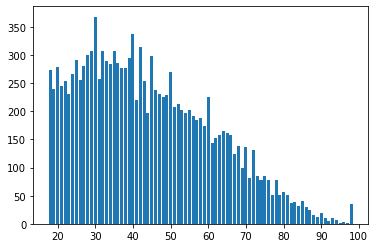

In [19]:
data_age=pd.value_counts(df['Edad']).to_frame().sort_index()
data_age.head(10)
plt.bar(data_age.index,data_age['Edad'])

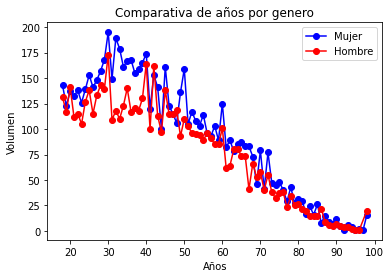

In [28]:
data_filter_M=df[df["Genero"] == "Mujer"]
data_filter_H=df[df["Genero"] == "Hombre"]
data_age_M = pd.value_counts(data_filter_M.Edad).to_frame().sort_index()
data_age_H = pd.value_counts(data_filter_H.Edad).to_frame().sort_index()
plt.plot(data_age_M.index,data_age_M["Edad"],'-bo', label='Mujer')
plt.plot(data_age_H.index,data_age_H["Edad"],'-ro', label='Hombre')
plt.xlabel("Años")
plt.ylabel("Volumen")
plt.title("Comparativa de años por genero")
plt.legend();
plt.show()

El nivel de educación más repetido es de secundaria con 3571, seguido de primaria con 2977, bachillerato con 2733 y licenciatura con 2709. Donde está el 88% de la población.

In [21]:
df_Nivel = pd.value_counts(df['Nivel Escolar']).to_frame()
df_Nivel

,Nivel Escolar
Secundaria.,3571
Primaria,2977
Preparatoria o bachillerato,2733
Licenciatura o ingeniería (profesional),2709
Ninguno,691
Estudios técnicos con preparatoria terminada.,315
Maestría o doctorado,260
Estudios técnicos con secundaria terminada,253
Normal básica,35
Preescolar o kínder,10


In [42]:
df_Nivel = df_Nivel.reset_index()
df_Nivel.rename(columns={'index': 'Nivel'}, inplace=True)
df_Nivel


,level_0,Nivel,Nivel Escolar
0,0,Secundaria.,3571
1,1,Primaria,2977
2,2,Preparatoria o bachillerato,2733
3,3,Licenciatura o ingeniería (profesional),2709
4,4,Ninguno,691
5,5,Estudios técnicos con preparatoria terminada.,315
6,6,Maestría o doctorado,260
7,7,Estudios técnicos con secundaria terminada,253
8,8,Normal básica,35
9,9,Preescolar o kínder,10


In [43]:


alt.Chart(df_Nivel).mark_bar().encode(
    alt.X('Nivel',sort='-y'),
    alt.Y('Nivel Escolar', title="Frecuencia"),
    alt.Color('Nivel', legend=None),
    tooltip=['Nivel', 'Nivel Escolar']
).properties(title="Escolaridad")

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [23]:
data_ingreso=pd.value_counts(df['Ingreso']).to_frame().sort_index()
data_ingreso

,Ingreso
0,5311
4,1
12,1
16,2
20,1
...,...
70000,4
80000,4
98000,2
100000,1


In [24]:
df_Ingreso = df.loc[df['Ingreso'] !=0, :]

df_Ingreso

,Escolaridad,Nivel Escolar,Ocupación,Ingreso,Cuenta de Nómina,Tarjeta de Débito,Tarjeta Dummy,Uso de Tarjeta,Bancos,BancoDummy,Tamaño de localidad,Región,RegionDummy,Genero,GeneroDummy,Edad
1,3,Secundaria.,trabajó por lo menos una hora,5000,No,Sí,1.0,0,0,0,100 000 y más habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Mujer,2,33
2,3,Secundaria.,trabajó por lo menos una hora,4000,No,NaN,NaN,0,0,0,100 000 y más habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Hombre,1,30
5,6,Preparatoria o bachillerato,trabajó por lo menos una hora,4600,Sí,Sí,1.0,2,Citibanamex,1,100 000 y más habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Mujer,2,20
7,6,Preparatoria o bachillerato,trabajó por lo menos una hora,8000,No,NaN,NaN,0,0,0,100 000 y más habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Hombre,1,28
8,8,Licenciatura o ingeniería (profesional),trabajó por lo menos una hora,17000,Sí,Sí,1.0,4,Banorte,3,100 000 y más habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Hombre,1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,3,Secundaria.,trabajó por lo menos una hora,2800,No,NaN,NaN,0,0,0,menor de 2 500 habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Mujer,2,41
13544,3,Secundaria.,trabajó por lo menos una hora,2000,No,NaN,NaN,0,0,0,menor de 2 500 habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Hombre,1,65
13545,3,Secundaria.,trabajó por lo menos una hora,8000,Sí,Sí,1.0,0,BBVA,2,menor de 2 500 habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Mujer,2,35
13550,3,Secundaria.,trabajó por lo menos una hora,3600,No,Sí,1.0,0,0,0,menor de 2 500 habitantes,"Occidente y Bajío (Aguascalientes, Guanajuato,...",1,Hombre,1,60


Se limpia la base, para solo mantener los valores donde hay ingresos, para trabajarlos, con este se graficó, un diagrama de ingreso, donde vemos que está muy cercano la distribución de este, con valores atípicos hacia arriba de los 20,000 pesos.

In [46]:
data_ingreso=pd.value_counts(df_Ingreso['Ingreso']).to_frame().sort_index()
data_ingreso


,Ingreso
4,1
12,1
16,2
20,1
30,1
...,...
70000,4
80000,4
98000,2
100000,1


In [47]:
data_ingreso = data_ingreso.reset_index()
data_ingreso.rename(columns={'index': 'Monto'}, inplace=True)
data_ingreso


,Monto,Ingreso
0,4,1
1,12,1
2,16,2
3,20,1
4,30,1
...,...,...
264,70000,4
265,80000,4
266,98000,2
267,100000,1


In [53]:
alt.Chart(data_ingreso).mark_point(opacity=0.8, size=100).encode(
    alt.X("Monto", title = "Ingreso", axis = alt.Axis(labelAngle = 0)),
    alt.Y('Ingreso', title = "Cantidad", sort="-y"),

).properties(title="Ingreso de Encuestados", width=400, height=400)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting
